In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage

from fmm_data_generator_3d import create_dataset

import os
import sys

os.chdir('../dataset')



In [2]:
# Load the 3D occupancy maps from a file
maps = np.load("final_occupancy_map.npy")



In [3]:
train_trial = 32
test_trial = 8
goal_trials = 10

env_size = [120,120,48]

travel_time_values_array_train, signed_distance_array_train, velocity_matrices_array_train, goals_train = create_dataset(maps=maps[:train_trial,:,:,:], num_trials=train_trial, goal_trials=goal_trials, env_size=env_size,erosion_trials = 1)
travel_time_values_array_test,  signed_distance_array_test,  velocity_matrices_array_test,  goals_test =  create_dataset(maps=maps[train_trial:,:,:,:], num_trials=test_trial,  goal_trials=goal_trials, env_size=env_size,erosion_trials = 1)

100%|██████████| 8/8 [00:35<00:00,  4.41s/it]


In [4]:
np.save("/mountvol/dataset-120/goals.npy",np.concatenate((goals_train,goals_test), axis=0))

# Save velocity_matrices_array as "mask.npy"
np.save("/mountvol/dataset-120/mask.npy", np.concatenate((velocity_matrices_array_train,velocity_matrices_array_test), axis=0))

# Save travel_time_values_array as "output.npy"
np.save("/mountvol/dataset-120/output.npy", np.concatenate((travel_time_values_array_train,travel_time_values_array_test), axis=0))

# Save signed_distance_array as "dist_in.npy"
np.save("/mountvol/dataset-120/dist_in.npy", np.concatenate((signed_distance_array_train,signed_distance_array_test),axis=0))

In [2]:
sdf = np.load('/mountvol/dataset-120/dist_in.npy')
mask = np.load('/mountvol/dataset-120/mask.npy')
output = np.load('/mountvol/dataset-120/output.npy')

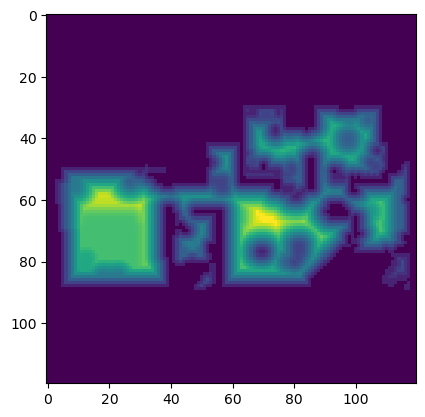

In [3]:
plt.imshow(sdf[0,:,:,25])

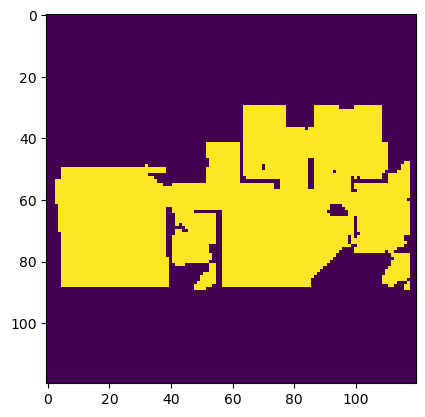

In [4]:
plt.imshow(mask[0,:,:,25])

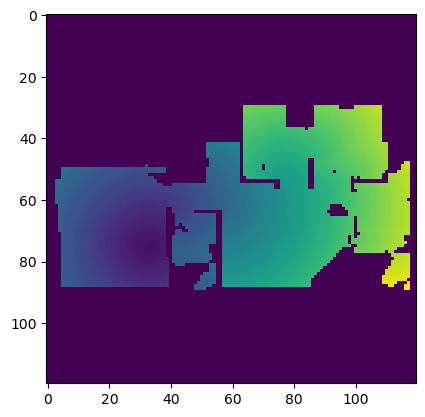

In [5]:
plt.imshow(output[0,:,:,25])